### Libraries

In [1]:
import geopandas as gpd
from geopandas.tools import overlay
import matplotlib.pyplot as plt
import os 
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/tmp/ipykernel_48290/3924256960.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
/opt/conda/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. Fo

### GeoDataFrame Object of 'Espacios Públicos en Puebla'

In [2]:
schema = 'espacios_publicos'
table = 'ep_puebla'
gdf = aup.gdf_from_db(table,schema)
gdf.head()

,NUMERO CONSECUTIVO,NOMBRE,TIPO,UBICACION,COLONIA,SUPERFICIE (EN METROS CUADRADOS),LATITUD,LONGITUD,geometry
0,1,3 DE MAYO,PARQUE,CALLE PRIMERO DE MAYO ENTRE 16 DE SEPTIEMBRE Y...,3 DE MAYO,1.20,19.08563,-98.16091,POINT (-98.16091 19.08563)
1,2,5 DE FEBRERO ORIENTE 1,JARDÍN VECINAL,ENTRE RETORNO A Y RETORNO B,INFONAVIT BOSQUES 5 DE FEBRERO,139.00,19.08349,-98.20219,POINT (-98.20219 19.08349)
2,3,5 DE FEBRERO ORIENTE 2,JARDÍN VECINAL,ENTRE RETORNO B Y REOTORNO C,INFONAVIT BOSQUES 5 DE FEBRERO,157.00,19.08336,-98.20180,POINT (-98.20180 19.08336)
3,4,5 DE FEBRERO ORIENTE 3,JARDÍN VECINAL,ENTRE RETORNO C Y CALLE 27 NORTE,INFONAVIT BOSQUES 5 DE FEBRERO,76.20,19.08323,-98.20134,POINT (-98.20134 19.08323)
4,5,5 DE FEBRERO ORIENTE 4,JARDÍN VECINAL,5 DE FEBRERO ORIENTE Y RETORNO A,INFONAVIT BOSQUES 5 DE FEBRERO,103.00,19.08364,-98.20259,POINT (-98.20259 19.08364)


In [3]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   NUMERO CONSECUTIVO                509 non-null    int64   
 1   NOMBRE                            509 non-null    object  
 2   TIPO                              509 non-null    object  
 3   UBICACION                         509 non-null    object  
 4   COLONIA                           508 non-null    object  
 5   SUPERFICIE (EN METROS CUADRADOS)  509 non-null    object  
 6   LATITUD                           509 non-null    float64 
 7   LONGITUD                          509 non-null    float64 
 8   geometry                          509 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(5)
memory usage: 35.9+ KB


Cambiamos los puntos a polygons

In [4]:
buffer_distance = 0.001 
gdf['geometry'] = gdf['geometry'].buffer(buffer_distance)

In [5]:
gdf.head()

,NUMERO CONSECUTIVO,NOMBRE,TIPO,UBICACION,COLONIA,SUPERFICIE (EN METROS CUADRADOS),LATITUD,LONGITUD,geometry
0,1,3 DE MAYO,PARQUE,CALLE PRIMERO DE MAYO ENTRE 16 DE SEPTIEMBRE Y...,3 DE MAYO,1.20,19.08563,-98.16091,"POLYGON ((-98.15991 19.08563, -98.15991 19.085..."
1,2,5 DE FEBRERO ORIENTE 1,JARDÍN VECINAL,ENTRE RETORNO A Y RETORNO B,INFONAVIT BOSQUES 5 DE FEBRERO,139.00,19.08349,-98.20219,"POLYGON ((-98.20119 19.08349, -98.20119 19.083..."
2,3,5 DE FEBRERO ORIENTE 2,JARDÍN VECINAL,ENTRE RETORNO B Y REOTORNO C,INFONAVIT BOSQUES 5 DE FEBRERO,157.00,19.08336,-98.20180,"POLYGON ((-98.20080 19.08336, -98.20080 19.083..."
3,4,5 DE FEBRERO ORIENTE 3,JARDÍN VECINAL,ENTRE RETORNO C Y CALLE 27 NORTE,INFONAVIT BOSQUES 5 DE FEBRERO,76.20,19.08323,-98.20134,"POLYGON ((-98.20034 19.08323, -98.20034 19.083..."
4,5,5 DE FEBRERO ORIENTE 4,JARDÍN VECINAL,5 DE FEBRERO ORIENTE Y RETORNO A,INFONAVIT BOSQUES 5 DE FEBRERO,103.00,19.08364,-98.20259,"POLYGON ((-98.20159 19.08364, -98.20159 19.083..."


In [6]:
gdf.crs = "EPSG:4487"

In [7]:
gdf.shape

(509, 9)

In [8]:
gdf['TIPO'].unique()

array(['PARQUE', 'JARDÍN VECINAL', 'JARDÍN', 'PARQUE DEPORTIVO',
       'PLAZA AJARDINADA', 'ÁREA VERDE', 'ÁREA RECREATIVA', 'DEPORTIVO',
       'JARDINERA', 'PLAZA', 'GLORIETA AJARDINADA', 'PARQUE VECINAL',
       'PARQUE CENTRAL', 'CAMPO DE FUTBOL', 'JARDIN ', 'JARDIN',
       'JARDIN VECINAL', 'PARQUE URBANO', 'PARQUE DEPORTIVA', 'ISLETA',
       'CAMELLON', 'AREA VERDE', 'AREA VERDE DE PLANTA', 'ANDADOR',
       'ISLETA AJARDINADA', 'PLAZA PRINCIPAL', 'PARQUE DEORTIVO',
       'AREAS VERDES', 'AREA DEPORTIVA', 'AREA RECREATIVA',
       'PARQUE DEPORTIIVO', 'CANCHAS', 'EXPLANADA'], dtype=object)

### Plot'Espacios Públicos'

/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:649: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


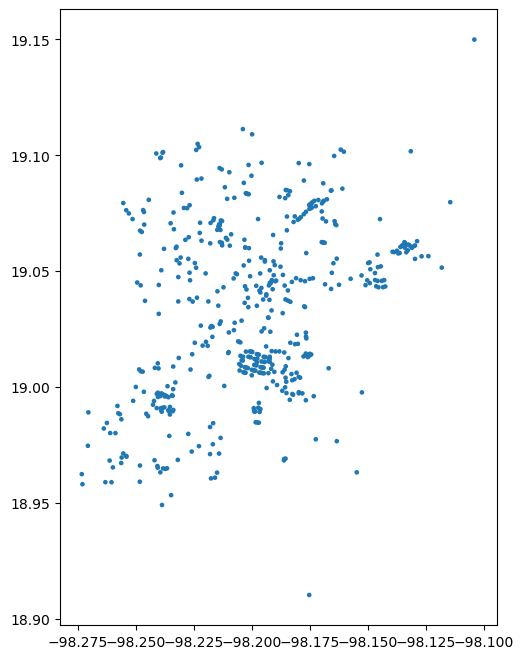

In [9]:
#gdf.plot()
f, axx = plt.subplots(1, figsize=(8, 8))
axx = gdf.plot(axes=axx, alpha=1)
#gdf.xlim(-103.8, -102.8)
#gdf.ylim(20.3, 21)
plt.show()
#trabajar con resolución 11
#city: gdl

### GeoDataFrame Object of 'Puebla' in Hexagons

In [10]:
hex_schema = "hexgrid"
hex_table = "hexgrid_8_city"
c = 'Puebla'
query = f'SELECT * FROM {hex_schema}.{hex_table} WHERE \"metropolis\" LIKE \'{c}\''
hex_gdl = aup.gdf_from_query(query, geometry_col='geometry')
hex_gdl.head(5)

,geometry,hex_id_8,CVEGEO,metropolis
0,"POLYGON ((-97.96730 19.04160, -97.97212 19.043...",88499405c3fffff,21001,Puebla
1,"POLYGON ((-97.96169 19.10379, -97.96651 19.106...",8849943b5bfffff,21001,Puebla
2,"POLYGON ((-97.94160 19.15927, -97.94129 19.154...",884994395bfffff,21001,Puebla
3,"POLYGON ((-97.89034 19.08562, -97.89516 19.087...",8849940eb1fffff,21001,Puebla
4,"POLYGON ((-97.88101 19.08627, -97.88583 19.088...",8849940eb5fffff,21001,Puebla


### Plot 'Hexagons-Puebla'

/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:649: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


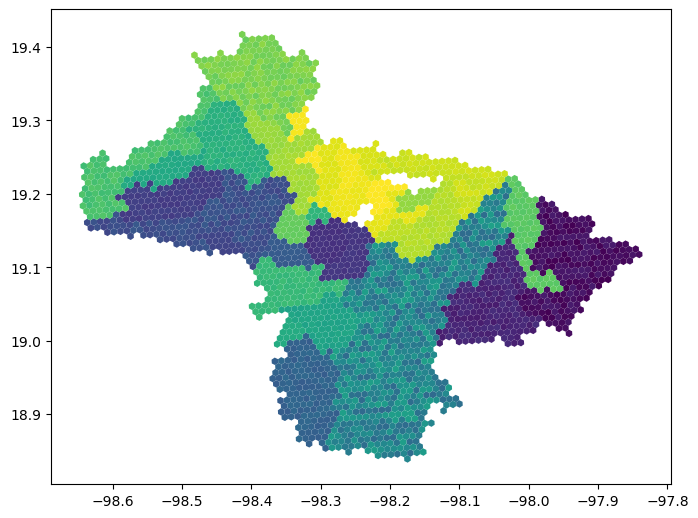

In [11]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = hex_gdl.plot(axes=ax, cmap = 'viridis',alpha= 1)
plt.show()

In [12]:
import leafmap

### Intersección Espacial

In [13]:
m = leafmap.Map()
m.add_gdf(gdf, layer_name="Espacios públicos", zoom_to_layer=True)
m.add_gdf(hex_gdl, layer_name="Hexagonos",zoom_to_layer=True)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [14]:
#Segundo paso: Ver variables dependientes para el modelo de predicción